In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Project-X-Lip-Reading

/content/drive/.shortcut-targets-by-id/1_r1ryXDRaCdsR0PFGkkxkbeXFIv5d38H/Project-X-Lip-Reading


In [24]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import pickle
from skimage.transform import resize
import time

In [25]:
people = ['F01','F02','F03','F04','F05','M01','M02','M03','M04','M05']
data_types = ['words']
folder_enum = ['01','02','03','04','05','06','07','08', '09', '10']
instances = ['01','02','03','04','05','06','07','08', '09', '10']
words = ['Begin', 'Choose', 'Connection', 'Navigation', 'Next', 'Previous', 'Start', 'Stop', 'Hello', 'Web']
phrases = ['Stop Navigation', 'Excuse me', 'I am sorry', 'Thank you', 'Good bye', 'I love this game', 'Nice to meet you', 'You are welcome', 'How are you', 'Have a good time']

In [26]:
with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/phrases/train/X_train.pkl', 'rb') as f:
   X_train = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/phrases/train/y_train.pkl', 'rb') as f:
   y_train = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/phrases/test/X_test.pkl', 'rb') as f:
   X_test = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/phrases/test/y_test.pkl', 'rb') as f:
   y_test = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/phrases/val/X_val.pkl', 'rb') as f:
   X_val = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/phrases/val/y_val.pkl', 'rb') as f:
   y_val = pickle.load(f)

In [27]:
import tensorflow as tf

# Load the model
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/Project-X-Lip-Reading/Model Architecture/Saved Model/3D_CNN_LSTM_phrases.h5')

In [28]:
y_pred = loaded_model.predict(X_test)

3/4 ━━━━━━━━━━━━━━━━━━━━ 8s 9s/step 

4/4 ━━━━━━━━━━━━━━━━━━━━ 30s 6s/step


In [29]:
scores = loaded_model.evaluate(X_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

4/4 ━━━━━━━━━━━━━━━━━━━━ 38s 9s/step - accuracy: 0.6923 - loss: 1.3768
Accuracy: 71.00%


In [30]:
np.argmax(y_pred, axis=1)

array([ 7,  7, 10,  6,  8,  4,  7,  8,  5, 10,  4,  3,  9,  9,  8,  1,  3,
        5,  7,  9,  8, 10,  4,  2,  1,  9,  2,  9,  3,  9,  2,  1,  1,  9,
        2,  8,  9,  7,  4,  5,  2,  2,  3,  2,  5,  1,  8,  1,  9,  6,  2,
       10,  1,  5,  9,  1, 10,  6,  4,  3,  5,  2,  7,  8, 10,  6, 10,  4,
        8, 10, 10, 10,  1,  8,  9,  9,  1,  8,  8,  1,  6,  8,  1,  7, 10,
       10,  3,  2,  9,  1, 10,  7,  2,  4, 10,  7,  8,  5,  8,  5])

In [31]:
predicted_words = [phrases[i-1] for i in np.argmax(y_pred, axis=1)]
actual_words = [phrases[i-1] for i in np.argmax(y_test, axis=1)]

correct = 0
for p, a in zip(predicted_words, actual_words):
    if p == a:
        correct += 1
    print(f"Predicted : {p} \t Actual : {a}")

accuracy = correct/len(actual_words)
print(f"Accuracy : {accuracy}")

Predicted : Nice to meet you 	 Actual : Nice to meet you
Predicted : Nice to meet you 	 Actual : Nice to meet you
Predicted : Have a good time 	 Actual : I am sorry
Predicted : I love this game 	 Actual : I love this game
Predicted : You are welcome 	 Actual : I love this game
Predicted : Thank you 	 Actual : Thank you
Predicted : Nice to meet you 	 Actual : Nice to meet you
Predicted : You are welcome 	 Actual : Thank you
Predicted : Good bye 	 Actual : Good bye
Predicted : Have a good time 	 Actual : I love this game
Predicted : Thank you 	 Actual : Thank you
Predicted : I am sorry 	 Actual : I am sorry
Predicted : How are you 	 Actual : How are you
Predicted : How are you 	 Actual : Thank you
Predicted : You are welcome 	 Actual : You are welcome
Predicted : Stop Navigation 	 Actual : Stop Navigation
Predicted : I am sorry 	 Actual : I am sorry
Predicted : Good bye 	 Actual : Good bye
Predicted : Nice to meet you 	 Actual : Thank you
Predicted : How are you 	 Actual : How are you
Pr

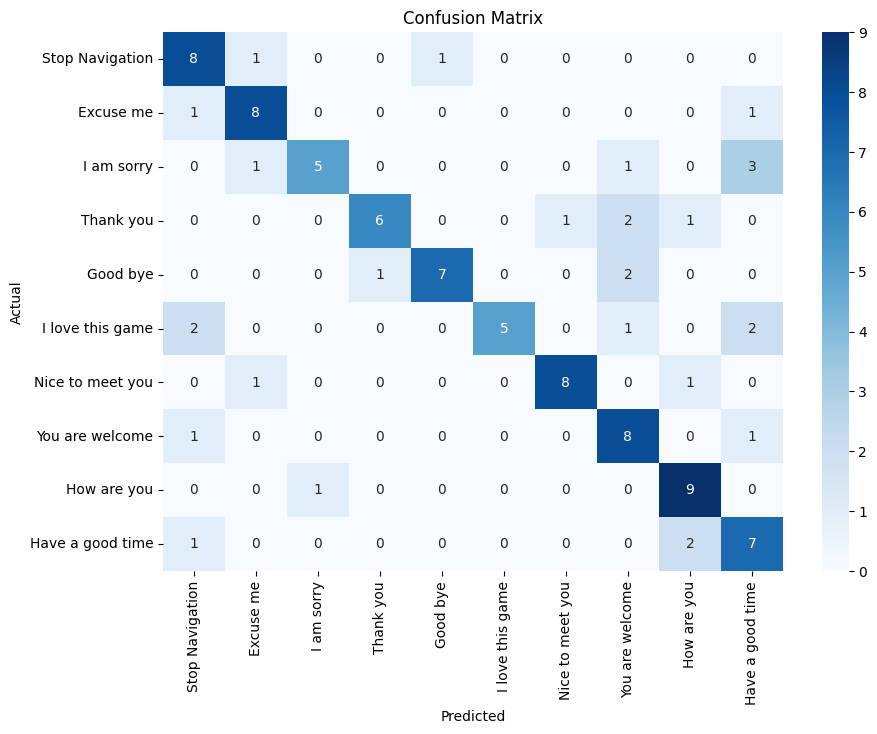

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(actual_words, predicted_words, labels=phrases)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=phrases, yticklabels=phrases)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()